##### 1. Load and clean the data set university_towns.txt

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
 
'''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''

t = pd.read_csv('university_towns.txt', sep='/n', header=None).rename(columns={0:'State'})
t.loc[~t['State'].str.contains("[edit]", regex=False), 'RegionName'] = t['State']
t.loc[t['State']==t['RegionName'],'State'] = np.nan
t['State'] = (t['State'].str.replace(r'\[.*','').fillna(method='ffill'))
t['RegionName'] = t['RegionName'].str.replace(r'\W*\(.*','')
university_towns = t.dropna()
university_towns

,State,RegionName
1,Alabama,Auburn
2,Alabama,Florence
3,Alabama,Jacksonville
4,Alabama,Livingston
5,Alabama,Montevallo
...,...,...
561,Wisconsin,River Falls
562,Wisconsin,Stevens Point
563,Wisconsin,Waukesha
564,Wisconsin,Whitewater


##### 2. Load and clean the data set gdplev.xls

In [2]:
GDP = (pd.read_excel('gdplev.xls', skiprows=7, usecols= [4,5], names = ['Quarter', 'GDP']))
GDP

,Quarter,GDP
0,1947q1,243.1
1,1947q2,246.3
2,1947q3,250.1
3,1947q4,260.3
4,1948q1,266.2
...,...,...
273,2015q2,17998.3
274,2015q3,18141.9
275,2015q4,18222.8
276,2016q1,18281.6


##### 3. Returns the year and quarter of the recession start time as a string value in a format such as 2005q3

In [32]:
#A recession is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
#For this assignment, only look at GDP data from the first quarter of 2000 onward.
GDP2000 = GDP[GDP['Quarter']>'2000']
rec_start_df = GDP2000[(GDP2000['GDP'] > GDP2000['GDP'].shift(-1)) & (GDP2000['GDP'].shift(-1) > GDP2000['GDP'].shift(-2))]
rec_start = rec_start_df.iloc[0,0]
rec_start


'2008q3'

##### 4. Returns the year and quarter of the recession end time as a string value in a format such as 2005q3

In [4]:
GDPStart = GDP[GDP['Quarter']>= rec_start]
rec_end_df = GDPStart[(GDPStart['GDP'] < GDPStart['GDP'].shift(-1)) & (GDPStart['GDP'].shift(-1) < GDPStart['GDP'].shift(-2))]  
rec_end = rec_end_df.iloc[0,0]   
rec_end


'2009q2'

##### 5. Returns the year and quarter of the recession bottom time as a string value in a format such as 2005q3

In [5]:
# A recession bottom is the quarter within a recession which had the lowest GDP.
GDPMid = GDP[(GDP['Quarter']>= rec_start) & (GDP['Quarter']<= rec_end)]
rec_bottom_df = GDPMid[GDPMid['GDP']==GDPMid['GDP'].min()]
rec_bottom = rec_bottom_df.iloc[0,0]
rec_bottom


'2009q2'

##### 6. Plot the data

<AxesSubplot:xlabel='Quarter'>

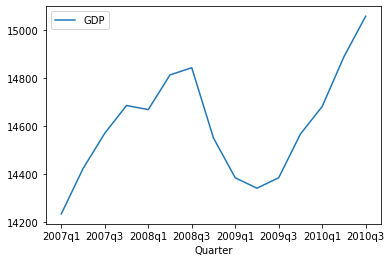

In [6]:
import matplotlib as plt
%matplotlib inline

linegraph = GDP[(GDP['Quarter']>= '2007q1') & (GDP['Quarter']<= '2010q3')]
linegraph.plot(x='Quarter', y='GDP')


In [7]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

##### 7. Load the data set 'City_Zhvi_AllHomes.csv'

In [8]:
df = pd.read_csv('City_Zhvi_AllHomes.csv')
df = df.drop(df.columns[[0] + list(range(3,51))], axis=1)
df

,RegionName,State,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,New York,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,Los Angeles,CA,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,Chicago,IL,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,Philadelphia,PA,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,Phoenix,AZ,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Town of Wrightstown,WI,101100.0,101500.0,102700.0,103700.0,105200.0,107300.0,110000.0,111800.0,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,Urbana,NY,77600.0,79400.0,80600.0,80200.0,81000.0,83800.0,88700.0,92400.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,New Denmark,WI,113900.0,114000.0,115800.0,117600.0,119100.0,121100.0,123900.0,126200.0,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,Angels,CA,148000.0,151200.0,153800.0,155600.0,156000.0,156100.0,156900.0,157700.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900


##### 8. Convert column names to quarters and map 'State' column

In [44]:
df2 = pd.DataFrame(df[['State', 'RegionName']])
    #df2.rename(columns={'RegionName':'TownName'},inplace=True)
for year in range(2000, 2016):
    df2[str(year) + 'q1'] = df[[str(year) + '-01', str(year) + '-02', str(year) + '-03']].mean(axis = 1)
    df2[str(year) + 'q2'] = df[[str(year) + '-04', str(year) + '-05', str(year) + '-06']].mean(axis = 1)
    df2[str(year) + 'q3'] = df[[str(year) + '-07', str(year) + '-08', str(year) + '-09']].mean(axis = 1)
    df2[str(year) + 'q4'] = df[[str(year) + '-10', str(year) + '-11', str(year) + '-12']].mean(axis = 1)
        
year = 2016
df2[str(year) + 'q1'] = df[[str(year) + '-01', str(year) + '-02', str(year) + '-03']].mean(axis = 1)
df2[str(year) + 'q2'] = df[[str(year) + '-04', str(year) + '-05', str(year) + '-06']].mean(axis = 1)
df2[str(year) + 'q3'] = df[[str(year) + '-07', str(year) + '-08']].mean(axis = 1)

df2['State'] = [states[state] for state in df2['State']]
df2 = df2.set_index(['State', 'RegionName'])
house_prices = pd.DataFrame(df2)
house_prices
    

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,Town of Wrightstown,101766.666667,105400.000000,111366.666667,114866.666667,125966.666667,129900.000000,129900.000000,129433.333333,131900.000000,134200.000000,...,144866.666667,146866.666667,149233.333333,148666.666667,149333.333333,149866.666667,149933.333333,149833.333333,151266.666667,155000.0
New York,Urbana,79200.000000,81666.666667,91700.000000,98366.666667,94866.666667,98533.333333,102966.666667,98033.333333,93966.666667,94600.000000,...,132133.333333,137033.333333,140066.666667,141700.000000,137866.666667,136466.666667,136166.666667,138966.666667,144200.000000,143000.0
Wisconsin,New Denmark,114566.666667,119266.666667,126066.666667,131966.666667,143800.000000,146966.666667,148366.666667,149166.666667,153133.333333,156733.333333,...,174566.666667,181166.666667,186166.666667,187600.000000,188666.666667,188433.333333,188933.333333,191066.666667,192833.333333,197600.0


##### 9. Create new data showing the decline or growth of housing prices between the recession start and the recession bottom

In [62]:
#A university town is a city which has a high percentage of university students compared to the total population of the city.

bstart = house_prices.columns[house_prices.columns.get_loc(rec_start) - 1]
housing = house_prices.loc[:,[bstart,rec_bottom]].reset_index()
housing['Ratio'] = (housing[bstart] - housing[rec_bottom]) / housing[bstart]
#housing = housing.dropna()

university_towns['Type'] = 'Uni'

housing = pd.merge(housing, university_towns, how = 'left', on = ['State','RegionName'])
housing['Type'] = housing['Type'].fillna('Non')

uni = housing[housing['Type'] == 'Uni']
non = housing[housing['Type'] == 'Non']

non


,State,RegionName,2008q2,2009q2,Ratio,Type
0,New York,New York,503933.333333,465833.333333,0.075605,Non
1,California,Los Angeles,502266.666667,413900.000000,0.175936,Non
2,Illinois,Chicago,237900.000000,219700.000000,0.076503,Non
3,Pennsylvania,Philadelphia,118133.333333,116166.666667,0.016648,Non
4,Arizona,Phoenix,205266.666667,168233.333333,0.180416,Non
...,...,...,...,...,...,...
10725,Wisconsin,Town of Wrightstown,149966.666667,144833.333333,0.034230,Non
10726,New York,Urbana,115900.000000,123433.333333,-0.064999,Non
10727,Wisconsin,New Denmark,173466.666667,178833.333333,-0.030938,Non
10728,California,Angels,328033.333333,282866.666667,0.137689,Non


##### 10. Run a ttest comparing the university town values to the non-university towns values,return whether the alternative hypothesis (that the two groups are the same) is true or not as well as the p-value of the confidence.

In [65]:
''' Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''

# Hypothesis: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean           price of houses in university towns the quarter before the recession starts compared to the recession bottom.                                    
# H0: Groups are the same  &   H1: Groups are different

ttest_pval = ttest_ind(uni['Ratio'].dropna(), non['Ratio'].dropna())[1]

if ttest_pval < 0.01:  # we reject H0 
    different = True
else:                  # we accept H0
    different = False


if uni['Ratio'].mean() > non['Ratio'].mean():  # Lower cost is better
    better = "non-university town"
else:
    better = "university town"

(different, ttest_pval, better)



(True, 0.00336292287685515, 'university town')